# Literature Analyses

This notebook analyses the collected and curated literature data for the aperiodic-clinical project. 

In [1]:
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from lisc.plts.words import plot_years

In [2]:
import seaborn as sns
sns.set_context('paper')

## Settings

In [3]:
# Define figure save path folder
save_folder = Path('./figs/')

In [4]:
SAVE_FIG = True

## Functions

In [5]:
def plot_hist(df, column, figsize=(3, 3), **kwargs):
    """Helper function to plot a histogram of data."""
    
    # Settings
    #color = '#0d72a8'
    color = '#111dcf'
    shrink = 0.8
    
    plt.figure(figsize=figsize)
    hist = sns.histplot(df, x=column, shrink=shrink, color=color, **kwargs)
    hist.set_xticks(hist.get_xticks())  
    hist.set_xticklabels(hist.get_xticklabels(), rotation=45, ha='right');

In [6]:
# Helper function for sub-selecting a minimum number of values
def min_count(df, column, min_value):
    return df.groupby(column).filter(lambda x : len(x) > min_value)

## Load the Data

In [7]:
# Set the file name
file_foler = Path('../data/')
file_name = 'apc_data.csv'

In [8]:
# Load the data
df = pd.read_csv(file_foler / file_name, skiprows=[0])

In [9]:
# Check the columns
df.columns

Index(['Disorder', 'Authors', 'Year', 'Month', 'DOI', 'Title', 'Journal',
       'Data', 'Analyzed Data', 'Amount of Data', 'Design', 'Analysis',
       '# Patients', 'Patient Ages', '# Control', 'Control Ages', 'Fit Method',
       'Fit Range', 'Settings Reporting', 'Report GOF', 'Clinical EXP',
       'Control EXP', 'Reported Finding for Aperiodic Exponent',
       'Report Effects Size', 'Effect Size Measure', 'Effects Size',
       'Biomarker', 'Interpretation', 'Notes'],
      dtype='object')

#### Clean up the loaded data

In [10]:
# Drop the null rows
df = df.dropna()

#### Manage column types

In [11]:
# Set years as integers
df['Year'] = df['Year'].astype('int')

In [12]:
# For months - set missing data as '1', and typecast to int
df['Month'].values[df['Month'].values == '-'] = '1'
df['Month'] = df['Month'].astype('int')

In [13]:
# Null out the control counts for reports with no values
df['# Control'].values[df['# Control'] == '-'] = np.nan

In [14]:
#mel_count=a['Names'].str.contains('Mel').sum()

In [15]:
aa = df[df['# Patients'].str.contains('\u202869')]['# Patients'].values

In [16]:
sum([int(el) for el in aa[0].split('\u2028')])

176

In [17]:
#df['# Patients'] = df['# Patients'].astype('int')
#df['# Control'] = df['# Control'].astype('int')

In [18]:
set(df['Analyzed Data'])

{'baseline',
 'events',
 'intraoperative',
 'movement',
 'resting',
 'samples',
 'sleep',
 'task',
 'unclear',
 'unconscious',
 'video'}

#### Check loaded dataframe

In [19]:
# Check some example rows
df.head(3)

,Disorder,Authors,Year,Month,DOI,Title,Journal,Data,Analyzed Data,Amount of Data,...,Report GOF,Clinical EXP,Control EXP,Reported Finding for Aperiodic Exponent,Report Effects Size,Effect Size Measure,Effects Size,Biomarker,Interpretation,Notes
1,ADHD,Robertson et al,2019,10,10.1152/jn.00388.2019,EEG Power Spectral Slope differs by ADHD statu...,Journal of Neurophysiology,EEG,resting,7m,...,no,1.67 +/- 0.27,1.51 +/- 0.32,⬆︎ clinical group,yes,eta-squared,0.088,yes,E/I ratio,Are multiple datasets / subsets included and a...
2,ADHD,Pertermann et al,2019,8,10.1016/j.bpsc.2019.03.011,The Modulation of Neural Noise Underlies the E...,Biological Psychiatry: Cognitive Neuroscience ...,EEG,task,1s,...,-,unclear,unclear,⬇︎ clinical group ⬆︎ w drug treatment,no,-,-,no,neural noise,Measurement is a little unclear - is a “neural...
3,ADHD,Ostlund et al,2021,4,10.1016/j.dcn.2021.100931,Behavioral and cognitive correlates of the ape...,Developmental Cognitive Neuroscience,EEG,resting,8m,...,no,unclear,unclear,⬇︎ clinical group,no,-,-,no,E/I ratio,Also report that exponent relates to reaction ...


## Disorders

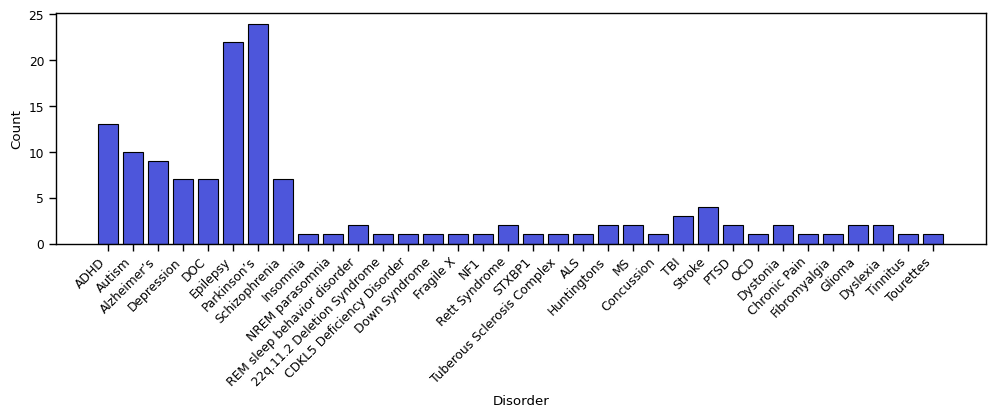

In [20]:
# Plot the histogram of disorders
plot_hist(df, 'Disorder', figsize=(12, 3))

In [21]:
disorder_counts = Counter(df['Disorder'])

In [22]:
min_n_disorders = 5
main_disorders = [label for label, count in disorder_counts.items() if count >= min_n_disorders]
main_disorders

['ADHD',
 'Autism',
 'Alzheimer’s',
 'Depression',
 'DOC',
 'Epilepsy',
 'Parkinson’s',
 'Schizophrenia']

In [23]:
main_disorders = disorder_counts.most_common(len(main_disorders))
main_disorders = [el[0] for el in main_disorders]
main_disorders

['Parkinson’s',
 'Epilepsy',
 'ADHD',
 'Autism',
 'Alzheimer’s',
 'Depression',
 'DOC',
 'Schizophrenia']

In [24]:
# Set order of the methods for plotting
cdf = df.copy()
cdf['Disorder'] = pd.Categorical(cdf['Disorder'], main_disorders)

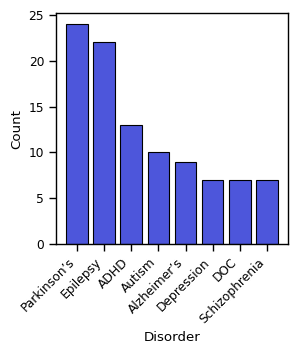

In [25]:
# Plot the histogram of disorders
plot_hist(cdf, 'Disorder')

In [26]:
# Set order of the methods for plotting
cdf = df.copy()
cdf['Disorder'] = pd.Categorical(cdf['Disorder'], main_disorders + ['Other'])
cdf['Disorder'].values[pd.isna(cdf['Disorder'])] = 'Other'

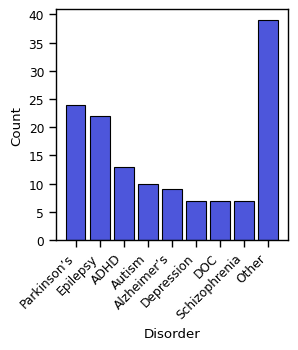

In [28]:
# Plot the histogram of disorders
plot_hist(cdf, 'Disorder')
if SAVE_FIG:
    plt.savefig(save_folder / 'reports-disorders.pdf', bbox_inches='tight')

## Publication Data

In [29]:
# Compute the counts per journal
journal_counts = Counter(df['Journal'].values)

In [30]:
n_preprints = journal_counts.pop('preprint')
print('Number of preprints: {}'.format(n_preprints))

Number of preprints: 16


In [31]:
# Check the number of journals
n_journals = len(journal_counts)
print('Number of journals: {}'.format(n_journals))

Number of journals: 77


In [32]:
# Check the most common journals
journal_counts.most_common(5)

[('Brain Communications', 6),
 ('Scientific Reports', 5),
 ("NPJ Parkinson's Disease", 4),
 ('Journal of Neurophysiology', 3),
 ('Cerebral Cortex', 3)]

### Check other values

In [33]:
assert len(set(df['DOI'])) == len(df['DOI'])
assert len(set(df['Title'])) == len(df['Title'])

In [34]:
#assert len(set(df['Authors'])) == len(df['Authors'])

In [35]:
Counter(df['Authors']).most_common(5)

[('Janjarasjitt & Loparo', 3),
 ('Carter Leno et al', 2),
 ('Akbarian et al', 2),
 ('Robertson et al', 1),
 ('Pertermann et al', 1)]

### Publication Years

NOTE / ToDo: 2024.5 publications

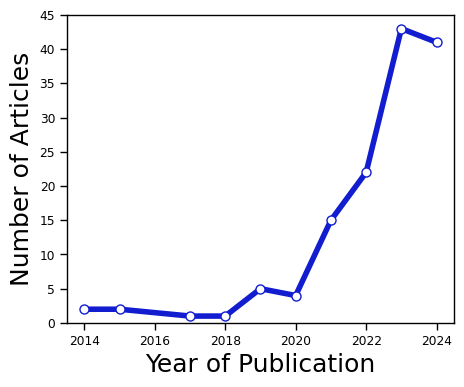

In [56]:
# Plot counts by years
#   Note: the 2024 value in this plot is a 6 months range 
year_counts = Counter(df['Year'])
plot_years(year_counts, year_range=[2014, 2024], lw=4, ms=13, color='#111dcf', figsize=(5, 4))

In [37]:
# Create version of years split by 6 months
half_years = df['Year'].values + (df['Month'] > 6) * 0.5
half_year_counter = Counter(half_years)

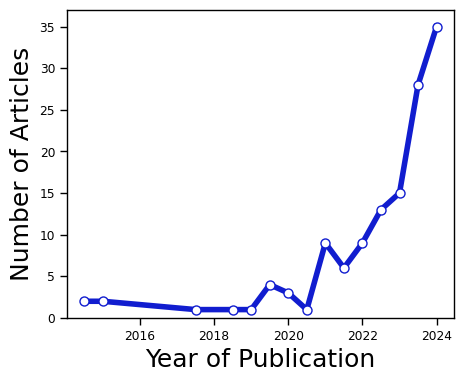

In [57]:
# Plot the reports across years, with 6 month datapoints
plot_years(half_year_counter, year_range=[2014, 2024], lw=4, ms=13, color='#111dcf', figsize=[5, 4])
if SAVE_FIG:
    plt.savefig(save_folder / 'reports-years.pdf', bbox_inches='tight')

## Recording Information

### Data Modality

In [39]:
# Set order of the methods for plotting
df['Data'] = pd.Categorical(\
    df['Data'], ['EEG','MEG','DBS','iEEG', 'RNS'])

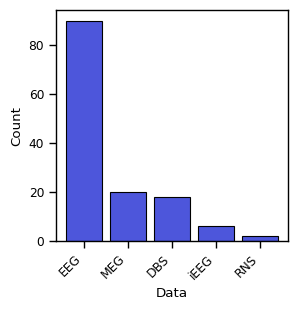

In [40]:
# Plot the histogram of data modalities
plot_hist(df, 'Data')
if SAVE_FIG:
    plt.savefig(save_folder / 'reports-modalities.pdf', bbox_inches='tight')

### Analyzed Data

In [41]:
# Set order of the methods for plotting
df['Analyzed Data'] = pd.Categorical(\
    df['Analyzed Data'], ['resting','task','events','video', 'sleep', 'unconscious', 
                          'intraoperative', 'baseline', 'samples','movement', 'unclear'])

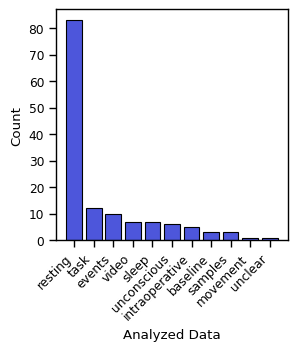

In [42]:
# Plot histogram of analyzed data
plot_hist(df, 'Analyzed Data')

In [30]:
main_data = ['resting','task','events','video', 'sleep', 'unconscious']

In [31]:
# Set order of the methods for plotting
cdf = df.copy()
cdf['Analyzed Data'] = pd.Categorical(cdf['Disorder'], main_data + ['other'])
cdf['Analyzed Data'].values[pd.isna(cdf['Analyzed Data'])] = 'Other'

TypeError: Cannot setitem on a Categorical with a new category (Other), set the categories first

## Dataset Information

## Method Information

### Fit Methods

In [43]:
# Set order of the methods for plotting
df['Fit Method'] = pd.Categorical(\
    df['Fit Method'], ['specparam', 'regression', 'Colombo', 'irasa', 'eBOSC', 'Bódizs', 'unclear'])

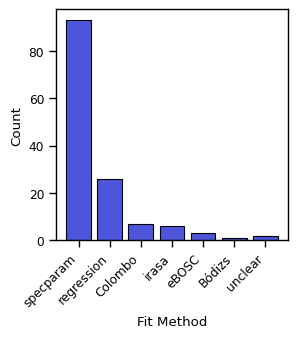

In [44]:
# Plot the histogram of fit methods
plot_hist(df, 'Fit Method')
if SAVE_FIG:
    plt.savefig(save_folder / 'reports-fitmethod.pdf', bbox_inches='tight')

## Results Information

### Interpretation

In [45]:
# Set order of the methods for plotting
df['Interpretation'] = pd.Categorical(\
    df['Interpretation'], ['E/I ratio', 'slowing', 'neural noise', 'oscillations',
                           'synchronicity', 'complexity', 'criticality', 
                           'timescale', 'integration', 'neurotransmission', 'unclear'])

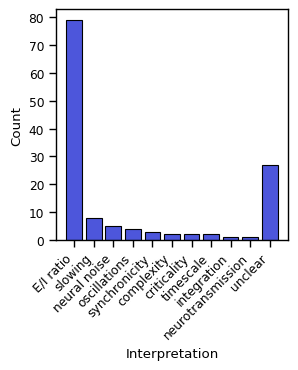

In [46]:
# Plot histogram of interpretations
plot_hist(df, 'Interpretation')
if SAVE_FIG:
    plt.savefig(save_folder / 'reports-interpretations_all.pdf', bbox_inches='tight')

In [59]:
# Replace low occuring interpretations with 'other'
replace_interps = ['complexity', 'criticality', 'timescale', 'integration', 'neurotransmission']

In [62]:
df = df.replace(replace_interps, 'other')

In [66]:
set(df['Interpretation'])

{'E/I ratio',
 nan,
 'neural noise',
 'oscillations',
 'slowing',
 'synchronicity',
 'unclear'}

In [63]:
# Set order of the methods for plotting
df['Interpretation'] = pd.Categorical(\
    df['Interpretation'], ['E/I ratio', 'slowing', 'neural noise', 'oscillations',
                           'synchronicity', 'other', 'unclear'])

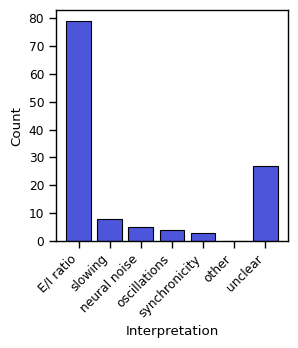

In [64]:
# Plot histogram of interpretations - sub-selected
plot_hist(min_count(df, 'Interpretation', 2), 'Interpretation')
if SAVE_FIG:
    plt.savefig(save_folder / 'reports-interpretations_min.pdf', bbox_inches='tight')

### Biomarker

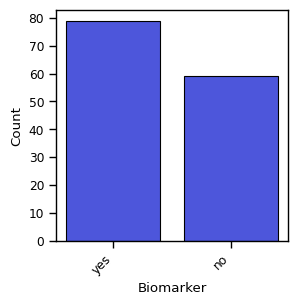

In [49]:
# Plot histogram of biomarker
plot_hist(df, 'Biomarker')
if SAVE_FIG:
    plt.savefig(save_folder / 'reports-biomarker.pdf', bbox_inches='tight')

### Report Values

In [50]:
# Get the subset of rows that report a clinical exponent 
dfr = df[np.logical_and(df['Clinical EXP'] != '-', df['Clinical EXP'] != 'unclear')]
len(dfr)

26

### Effect Size

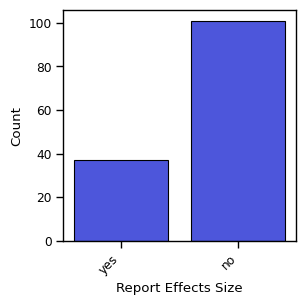

In [51]:
# Plot histogram of effect size
plot_hist(df, 'Report Effects Size')
if SAVE_FIG:
    plt.savefig(save_folder / 'reports-effectsize.pdf', bbox_inches='tight')

In [54]:
df['Effect Size Measure'] = pd.Categorical(\
    df['Effect Size Measure'], ["cohen's-d", 'eta-squared', 'z-score', 'AUC',
                                'biserial rank correlation', "cohen’s f^2", 'log(odds)', 'unclear'])

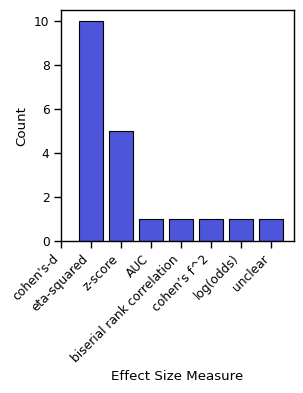

In [55]:
# Plot histogram of effect size - subselected for those that report
dfe = df[df['Effect Size Measure'] != '-']
plot_hist(dfe, 'Effect Size Measure')